# ASSIGNMENT 3
- Nama          : Lisa Wahyu Ningsih
- Kode peserta  : PYTN-KS15-007
- Kelas		    : KS-015
- Program	    : Python for Data Science

# Bank 4 (Menggunakan data bank)

# Classification 

- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machine
- Decision Tree
- Random Forest
- Naive Bayes
- Confusion Matrix 
- Visualization 



## Preprocessing Data
- Import Pustaka
- Data Loading
- Data Cleaning
- EDA (Exploration Data Analysis)

### Import Pustaka

In [3]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats as stats

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from sklearn.datasets import load_digits, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from IPython.display import Math, Latex
from IPython.core.display import Image
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize' : (7,7)})
import statsmodels.api as sm

import random
import warnings 
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
%matplotlib inline

### Data Loading 

In [4]:
df=pd.read_csv('bank.csv', sep=';')
print(df)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [5]:
print(df.shape)

(4521, 17)


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
df["y"].dtype

dtype('O')

In [11]:
df['y_num']=df["y"].replace({"no":0, "yes":1})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


In [12]:
df["y_num"].dtype

dtype('int64')

untuk menampilkan kolom

In [13]:
df_=df.head(10)
df_.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y', 'y_num'],
      dtype=object)

untuk memeriksa apakah ada kolom yang memiliki nilai null

In [14]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
y_num        0
dtype: int64

berdasarkan hasil output diatas menunjukkan bahwa tidak ada missing value pada data

In [15]:
print(df.isnull().any())

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
y_num        False
dtype: bool


## Data Cleaning

Tidak perlu melakukan data cleaning karena tidak terdapat missing value

## Exploration Data Analysis (EDA)

In [16]:
print(df.groupby)

<bound method DataFrame.groupby of       age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  d

In [17]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y_num
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [18]:
df.min()

age                19
job            admin.
marital      divorced
education     primary
default            no
balance         -3313
housing            no
loan               no
contact      cellular
day                 1
month             apr
duration            4
campaign            1
pdays              -1
previous            0
poutcome      failure
y                  no
y_num               0
dtype: object

In [19]:
df.max()

age               87
job          unknown
marital       single
education    unknown
default          yes
balance        71188
housing          yes
loan             yes
contact      unknown
day               31
month            sep
duration        3025
campaign          50
pdays            871
previous          25
poutcome     unknown
y                yes
y_num              1
dtype: object

In [20]:
cats=[i for i in df.columns if df[i].dtypes == 'object']
nums=[i for i in df.columns if df[i].dtypes != 'object']

## Logistic Regression

In [21]:
x = df.drop(['y'], axis=1)
y = df['y']

In [22]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_num
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [23]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [24]:
df_x = pd.get_dummies(x)
df_x.head()

,age,balance,day,duration,campaign,pdays,previous,y_num,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [25]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   day                  4521 non-null   int64
 3   duration             4521 non-null   int64
 4   campaign             4521 non-null   int64
 5   pdays                4521 non-null   int64
 6   previous             4521 non-null   int64
 7   y_num                4521 non-null   int64
 8   job_admin.           4521 non-null   uint8
 9   job_blue-collar      4521 non-null   uint8
 10  job_entrepreneur     4521 non-null   uint8
 11  job_housemaid        4521 non-null   uint8
 12  job_management       4521 non-null   uint8
 13  job_retired          4521 non-null   uint8
 14  job_self-employed    4521 non-null   uint8
 15  job_services         4521 non-null   uint8
 16  job_student          452

In [26]:
X_train,X_test,y_train,y_test = train_test_split(df_x,y,test_size = 0.25,random_state = 123)

In [27]:
log_model =LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
y_predict = log_model.predict(X_test)

In [28]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      1008
         yes       1.00      1.00      1.00       123

    accuracy                           1.00      1131
   macro avg       1.00      1.00      1.00      1131
weighted avg       1.00      1.00      1.00      1131



In [29]:
print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 1.0


## KNN (K-Nearest Neighbors)

In [30]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
y_pred_2 = model_knn.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

          no       0.91      0.95      0.93      1008
         yes       0.39      0.24      0.29       123

    accuracy                           0.88      1131
   macro avg       0.65      0.60      0.61      1131
weighted avg       0.85      0.88      0.86      1131



In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred_2))

Accuracy: 0.8762157382847038


## SVM (Support Vector Machine)

In [33]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_predict_3 = model_svm.predict(X_test)

In [34]:
print(classification_report(y_test, y_predict_3))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      1008
         yes       0.00      0.00      0.00       123

    accuracy                           0.89      1131
   macro avg       0.45      0.50      0.47      1131
weighted avg       0.79      0.89      0.84      1131



In [35]:
print("Accuracy:", accuracy_score(y_test, y_predict_3))

Accuracy: 0.8912466843501327


## Decission tree

In [36]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_predict_4 = model_dt.predict(X_test)

In [37]:
print(classification_report(y_test, y_predict_4))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      1008
         yes       1.00      1.00      1.00       123

    accuracy                           1.00      1131
   macro avg       1.00      1.00      1.00      1131
weighted avg       1.00      1.00      1.00      1131



In [38]:
print("Accuracy:", accuracy_score(y_test, y_predict_4))

Accuracy: 1.0


## Random Forest

In [39]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
y_predict_5 = model_rfc.predict(X_test)

In [40]:
print(classification_report(y_test, y_predict_5))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      1008
         yes       1.00      1.00      1.00       123

    accuracy                           1.00      1131
   macro avg       1.00      1.00      1.00      1131
weighted avg       1.00      1.00      1.00      1131



In [41]:
print("Accuracy:", accuracy_score(y_test, y_predict_5))

Accuracy: 1.0


## Naive Bayes

In [42]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_predict_6 = model_nb.predict(X_test)

In [43]:
print(classification_report(y_test, y_predict_6))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      1008
         yes       1.00      1.00      1.00       123

    accuracy                           1.00      1131
   macro avg       1.00      1.00      1.00      1131
weighted avg       1.00      1.00      1.00      1131



In [44]:
print("Accuracy:", accuracy_score(y_test, y_predict_6))

Accuracy: 1.0


Berdasarkan output diatas, kita akan mengambil model logistik regresi yang akan digunakan untuk Confussion Matrix:

In [45]:
y_score = log_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=log_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=log_model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

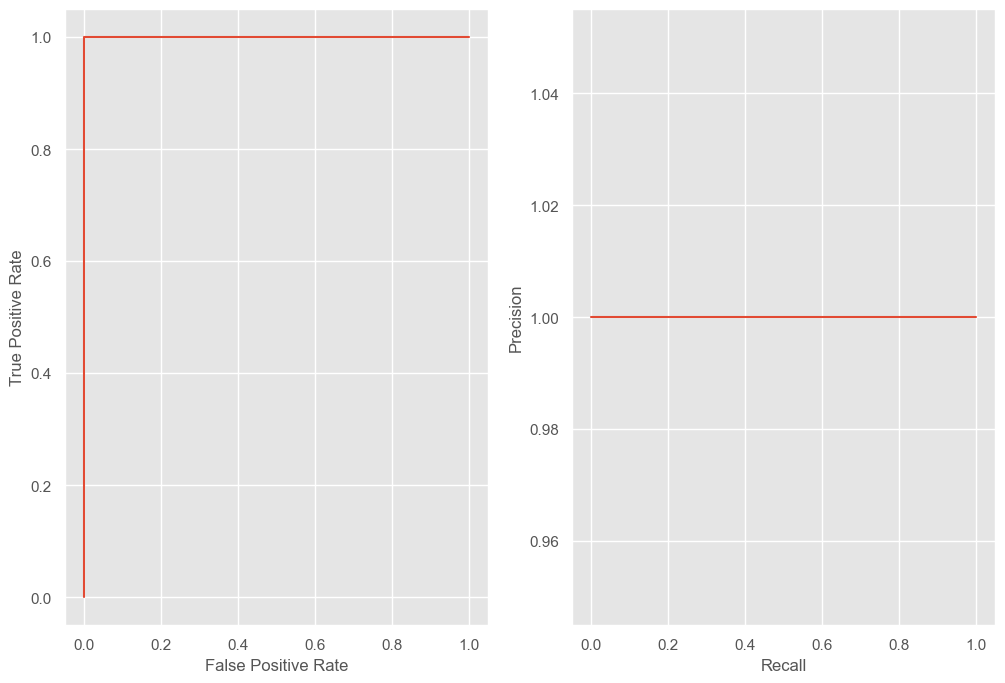

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

## Visualization

#### Confussion Matrix

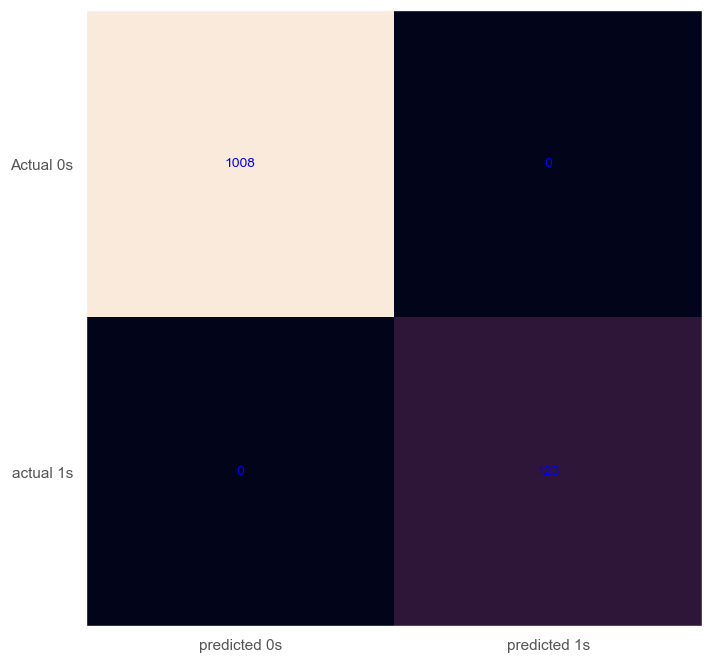

In [47]:
cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predicted 0s', 'predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range (2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='blue')
plt.show()

Setelah dilakukan Confusion Matrix, didapat : 
- True Negatives 1008
- False Negatives 0
- False Positives 0
- True Positives 123

#### pairplot

In [48]:
df['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [49]:
df_final = df[df['marital'] != 'unknown']
df_final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,0


In [50]:
df_final.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


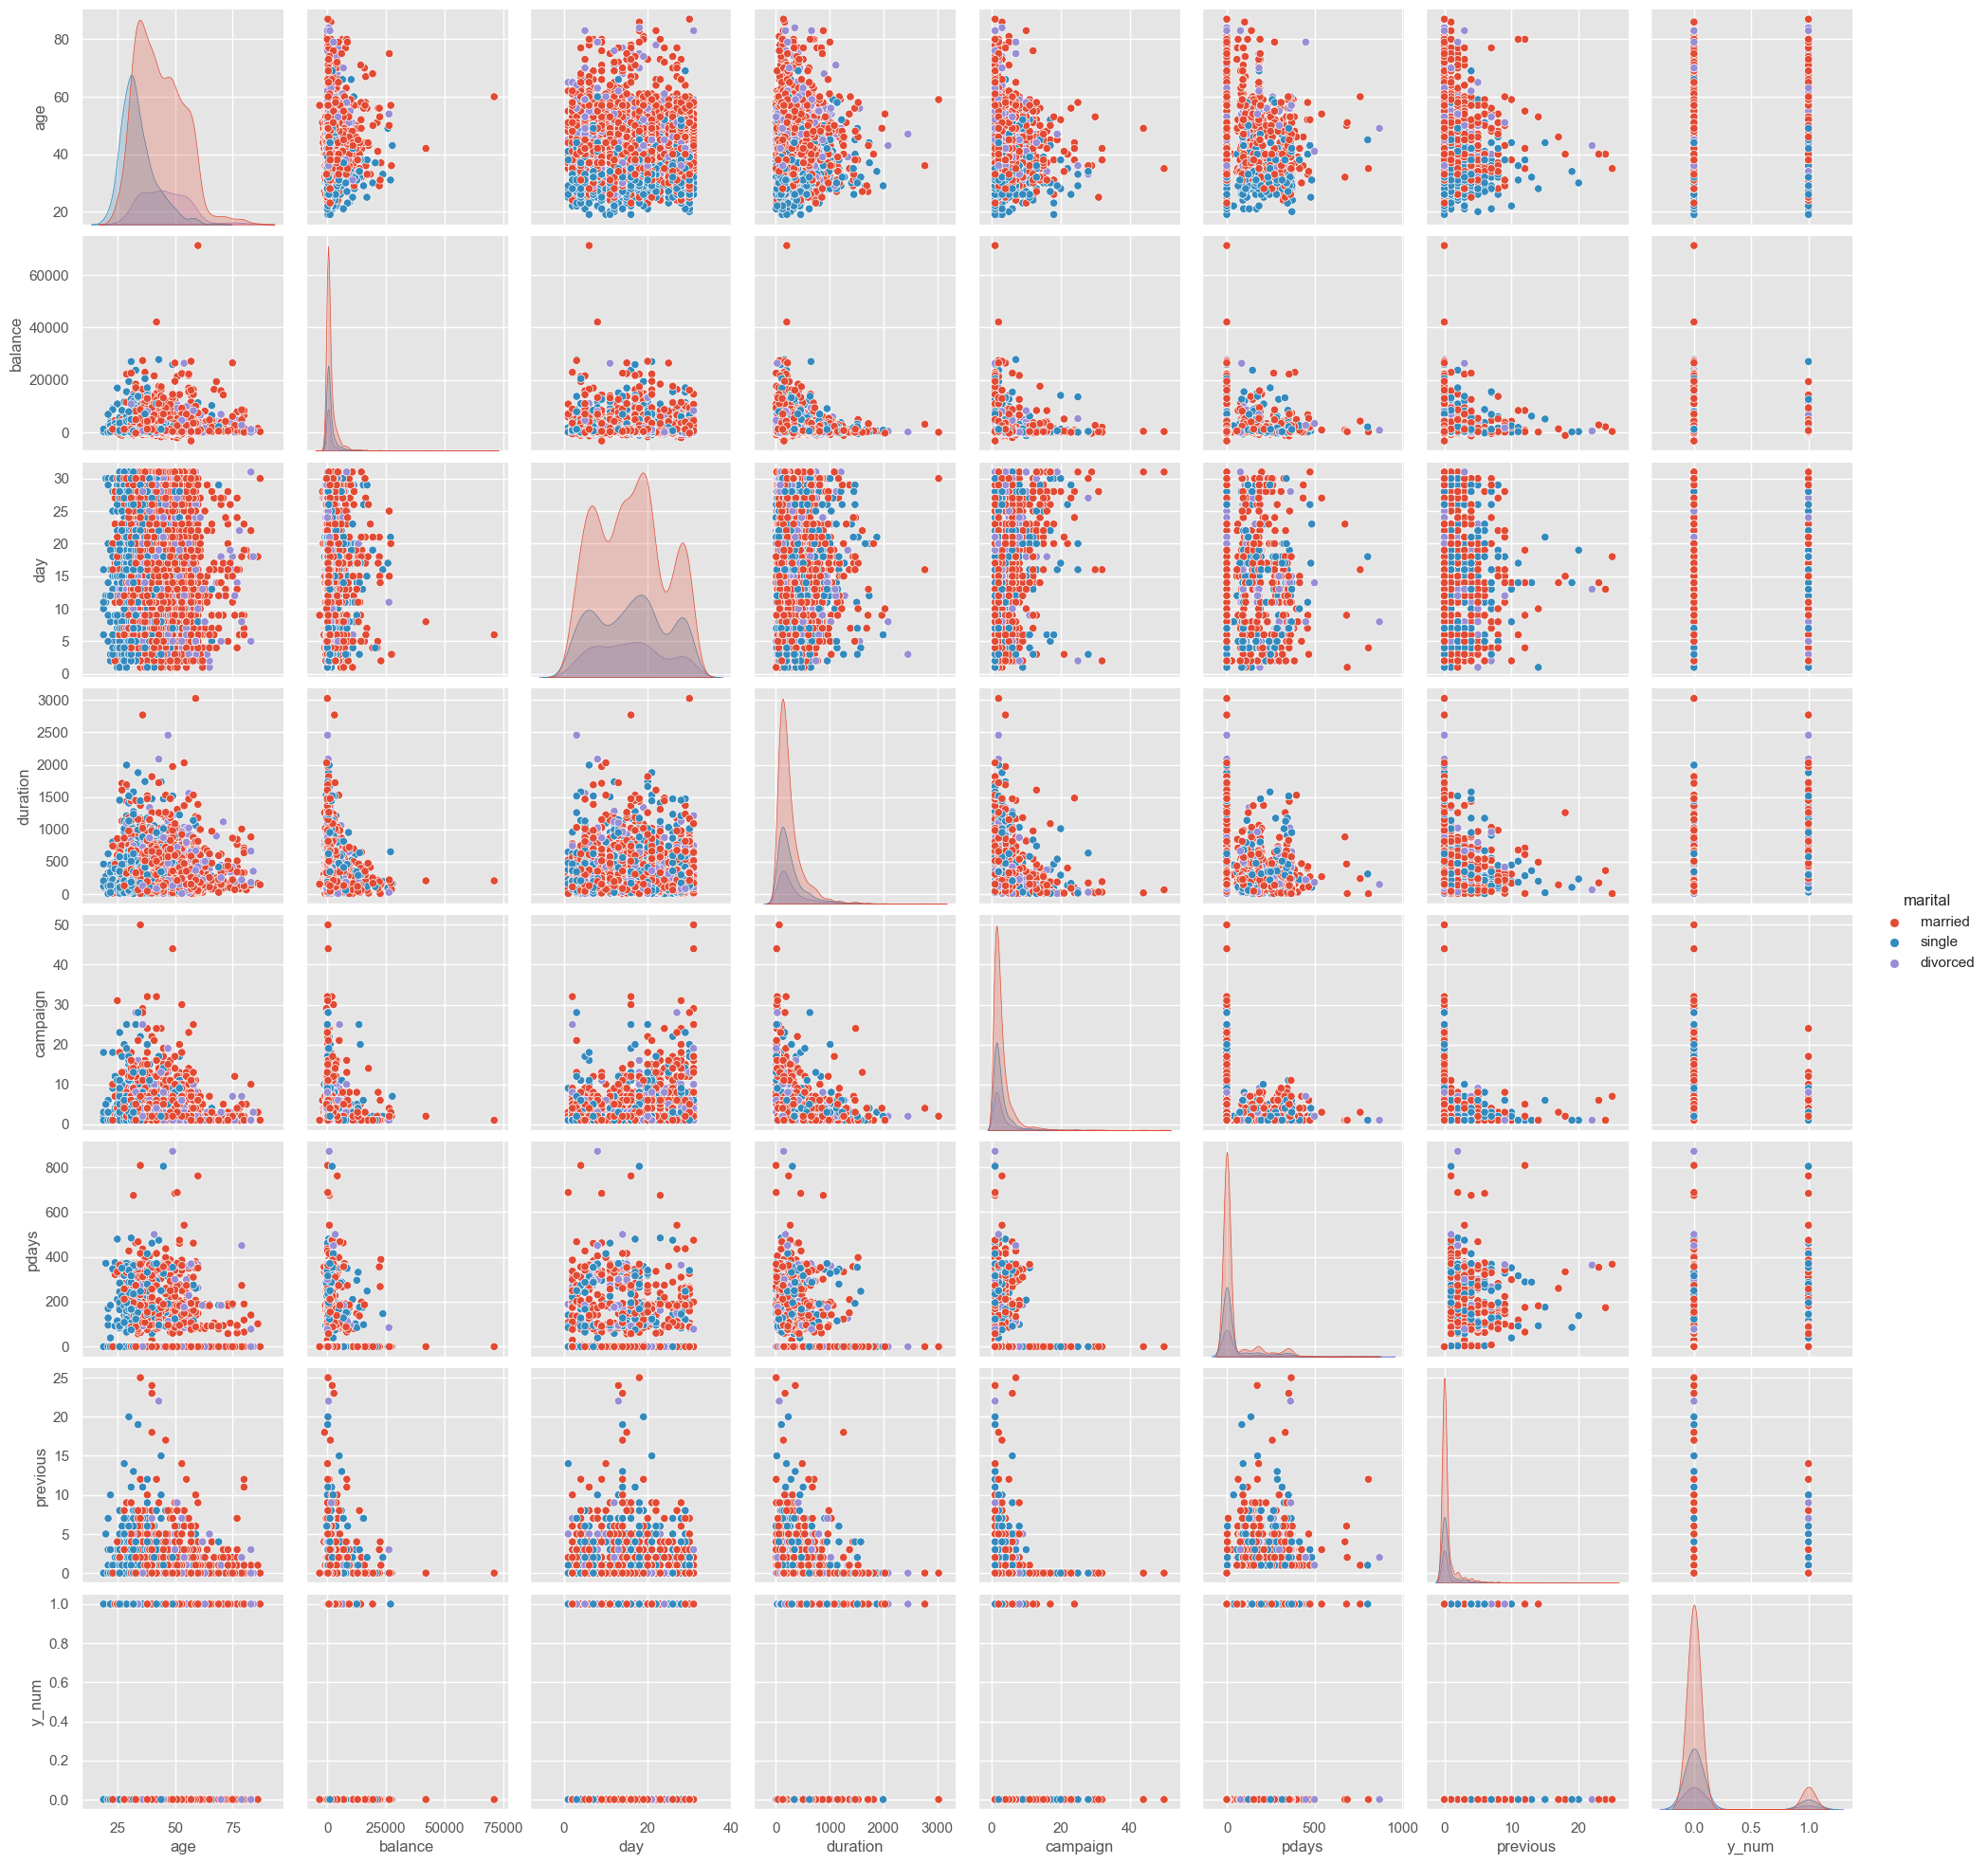

In [51]:
sns.pairplot(df_final, hue='marital', size=2.5)

#### Histogram

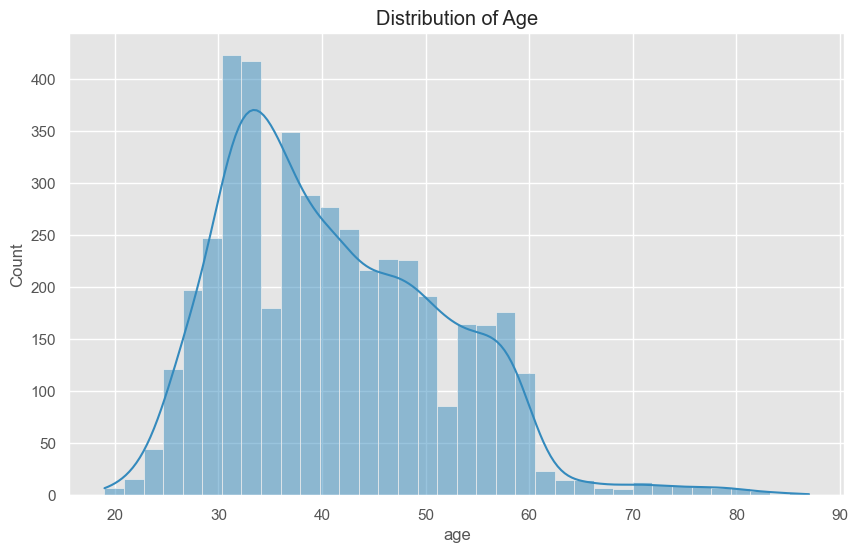

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="age", kde=True)
plt.title("Distribution of Age")
plt.show()

##### Interpretasi Output Histogram:
Berdasarkan output diatas, dapat dilihat bahwa kelompok umur antara 30-40 memiliki frekuensi tertinggi yang berlangganan deposito diantara kelompok umur lainnya

#### Scatter Plot

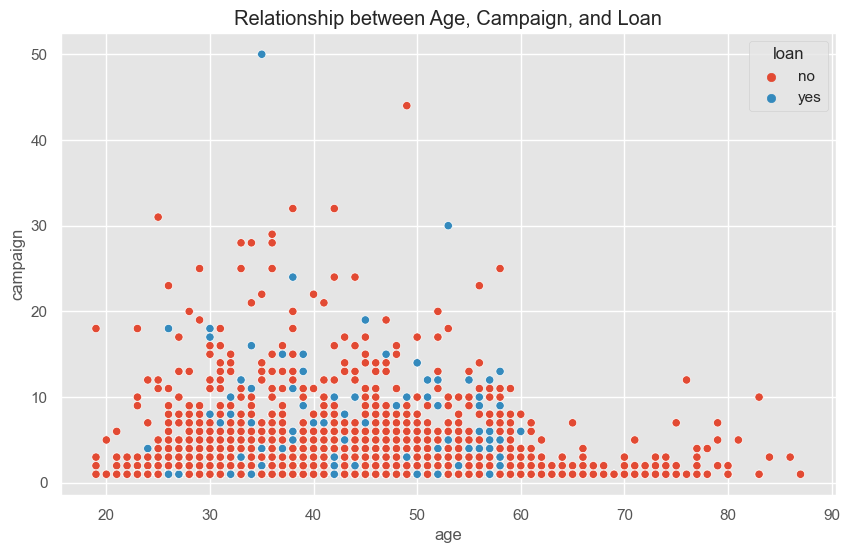

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="age", y="campaign", hue="loan")
plt.title("Relationship between Age, Campaign, and Loan")
plt.show()

##### Interpretasi Output Scatter Plot:
Berdasarkan output diatas, dapat dilihat bahwa plot menyebar yang artinya relationship between age, loan, and campaign memiliki hubungan atau korelasi yang sangat rendah atau bahkan tidak ada hubungan

#### Pie Chart

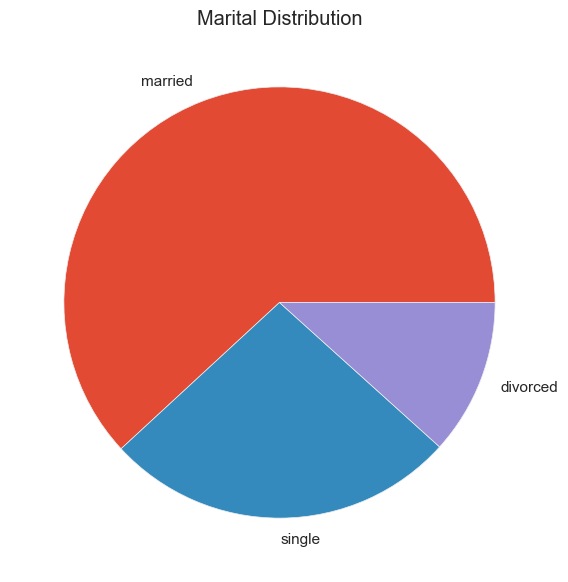

In [54]:
married_ = df['marital'].value_counts()
plt.pie(married_, labels=married_.index)
plt.title('Marital Distribution')
plt.show()

##### Interpretasi Output Pie Chart:
Berdasarkan output diatas, dapat dilihat bahwa angka status pernikahan terbanyak yang berlangganan deposito adalah menikah, disusul dengan status single, dan cerai.

#### Heatmap

<AxesSubplot:>

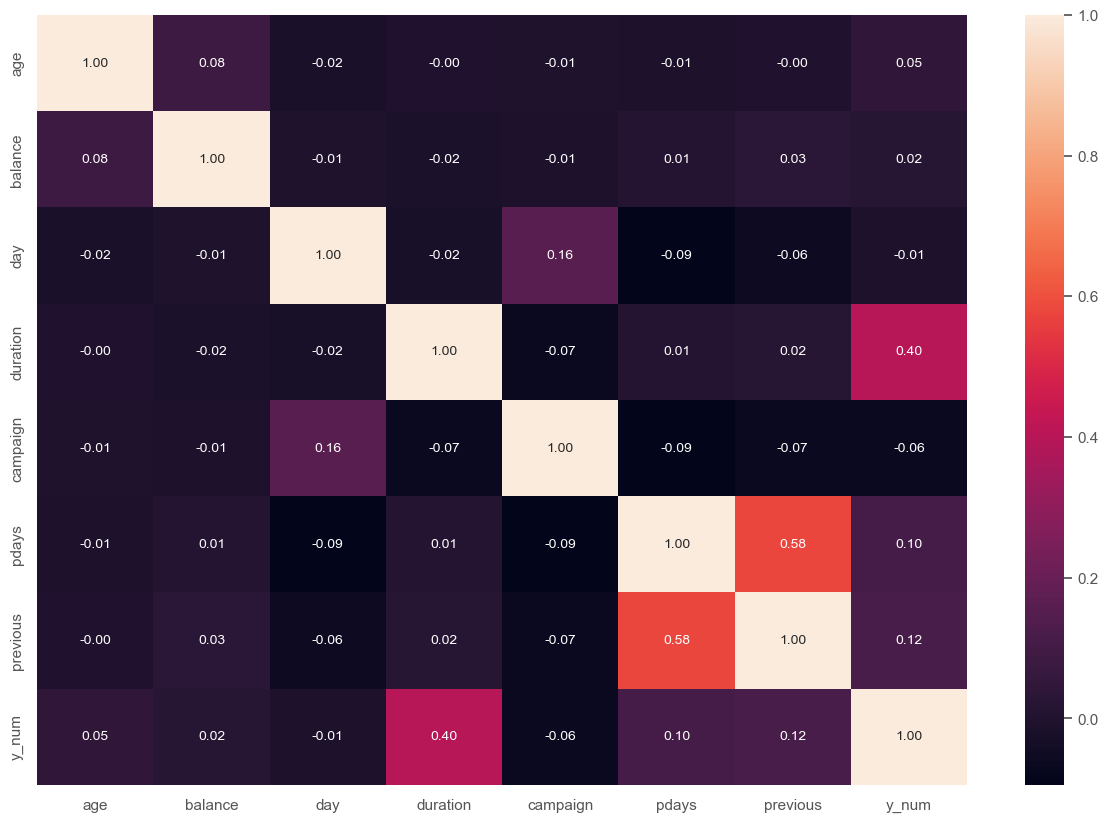

In [55]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

##### Interpretasi Output Heatmap:

Berdasarkan output diatas, sebagian data memiliki korelasi yang sangat lemah (<0.2) dan yang lainnya memiliki korelasi sedang hingga tinggi. tingkat korelasi juga bisa dilihat dari warna yang tertera, semakin terang warnanya maka semakin kuat korelasinya.